Arindita Prihastama | 1494037162100-370 | arinditap@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.models import Sequential

In [ ]:
url = 'https://raw.githubusercontent.com/arinditap/dicoding-MachineLearning/main/testset.csv'
dt = pd.read_csv(url)
dt.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
dt.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [ ]:
df = dt[['datetime_utc',' _tempm']]
df

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0
...,...,...
100985,20170424-06:00,34.0
100986,20170424-09:00,38.0
100987,20170424-12:00,36.0
100988,20170424-15:00,32.0


In [ ]:
#df.columns = ['date', 'temp']

In [ ]:
df.isnull().sum()

datetime_utc      0
 _tempm         673
dtype: int64

In [ ]:
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100317 entries, 0 to 100989
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100317 non-null  datetime64[ns]
 1    _tempm       100317 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,datetime_utc,_tempm
0,1996-11-01 11:00:00,30.0
1,1996-11-01 12:00:00,28.0
2,1996-11-01 13:00:00,24.0
3,1996-11-01 14:00:00,24.0
4,1996-11-01 16:00:00,23.0


In [ ]:
df = df.set_index('datetime_utc')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)

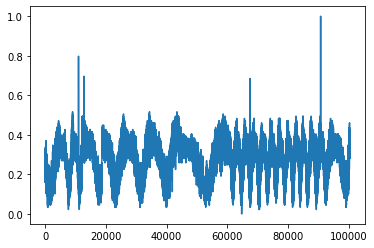

In [ ]:
plt.plot(data)

In [ ]:
tgl = df['datetime_utc'].values
temp = df[' _tempm'].values

In [ ]:
latih_size = int(len(data) * 0.8)
uji_size = len(data) - latih_size
X_data, y_data = data[0:latih_size, :], data[latih_size: len(data), :1]
latih_size, uji_size

In [ ]:
def dataset(dataset, time_step=1):
  X, Y = [],[]
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]
    X.append(a)
    Y.append(dataset[i + time_step, 0])
  return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = dataset(X_data, 100)
X_test, y_test = dataset(y_data, 100)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape = (100,1), return_sequences = True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1),
])

In [ ]:
skala_data = (max(data) - min(data)) * 0.1
print(skala_data)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('mae') < skala_data) and (logs.get('val_mae') < skala_data):
            self.model.stop_training = True;
            print('\nMae telah dibawah 10% dari skala data yaitu {}'.format(skala_data))

callbacks = myCallback()

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=['mae'])
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 5,
    batch_size = 128, 
    callbacks = [callbacks],
    verbose = 1
)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()